<a href="https://colab.research.google.com/github/deepali0711/Image-classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data : Images
# step1. scrape the images using libraries.(python library)


In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("flower", limit=25,output_dir='images',adult_filter_off=True)
downloader.download("bird", limit=25,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.zoebuckman.com/wp-content/uploads/2015/05/red-purple-white-flowers-fine-art-photography-present-life-683x1024.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.architecturendesign.net/wp-content/uploads/2015/01/DIY-project-for-homedecor-29.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.mondofloraldesigns.com.au/wp-content/uploads/C00230_SCB150820.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://sdda.sd.gov/images/farming-ranching-agribusiness/farming_psthist_1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://good-morning.cc/wp-content/uploads/2019/08/4552-11.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://rachelaclingen.com/wp-content/uploads/2015/12/Sri-Lankan-Oil-Lamp-Weddings-Toronto.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://weneedfun.com/wp-content/uploads/2017/01/Mustang-B

In [ ]:
import numpy as np

a = np.array([1,2,3,4,5])
a.ndim

1

In [ ]:
# step2 Preprocessing
# 1.resize
# 2. flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['bird','flower']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)




In [ ]:
len(flat_data[0])

67500

In [ ]:
150*150

22500

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

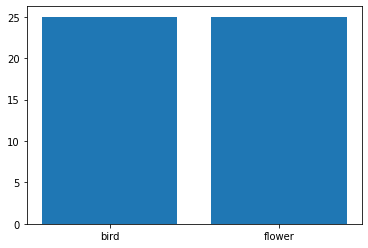

In [ ]:
unique,count =  np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
#split data into training nd testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {
                'C':[1,10,100,1000],
                'kernel':['linear']
              },
              {
                'C':[1,10,100,1000],
                'gamma':[0.001,0.0001],
                'kernel':['rbf']
              },
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
y_test

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6

In [ ]:
confusion_matrix(y_pred,y_test)

array([[6, 6],
       [0, 3]])

(224, 224, 3)
PREDICTED OUTPUT: bird


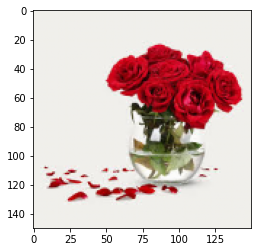

In [ ]:
flat_data = []
url = input("Enter your image url: ")
img = imread(url) 
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = clf.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')